# Multimodal Rigid Registration

The method used here works as follows: 
+ Resize images for faster feature computation
+ Compute MIND features
+ Find mutual matches between MIND features of one image with the MIND features of the other image
+ Estimate AffineTransformation using RANSAC
+ Warp and return the image

Unfortunatelly we currently have no multimodal fundus images which we could show here. Hence we distorted one of skimages example images here.

In [1]:
import numpy as np
import eyepy as ep
import skimage as ski
import matplotlib.pyplot as plt

tform = ski.transform.AffineTransform(scale=(0.9,0.8), rotation=2/11,
                           translation=(0, -100))

dst = ski.color.rgb2gray(ski.data.astronaut())
src = abs(ski.transform.warp(dst, tform) -0.5)

CPU times: user 3.98 s, sys: 1.4 s, total: 5.38 s
Wall time: 2.27 s


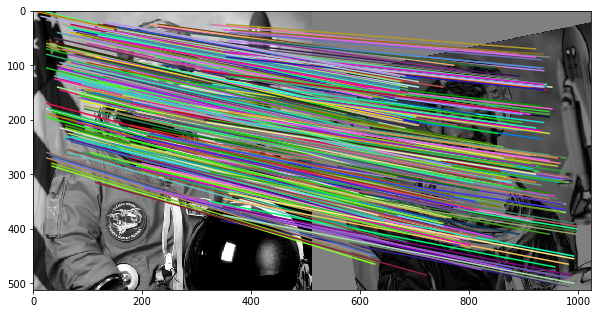

In [2]:
%%time
model = ep.register.register(src, dst, detector="dense", scale=0.2,
                             transformation="affine",
                             descriptor="mind", 
                             descriptor_kwargs = {"r":5, "sigma":0.2},
                             ransac_kwargs ={"residual_threshold": 10, 
                                            "max_trials": 2000},
                            verbose = True)

In [3]:
print(("Differences in: \n Scale: {}\n "
      "Rotation: {}\n"
      " Translation: {}").format(np.array(model.scale) - np.array(tform.scale), 
                                 model.rotation-tform.rotation, 
                                 model.translation-tform.translation))

Differences in: 
 Scale: [-0.00156002  0.00673015]
 Rotation: -0.0010880894106193029
 Translation: [-0.14772403 -0.4828153 ]


In [4]:
transformed_src = ski.transform.warp(src, model.inverse)

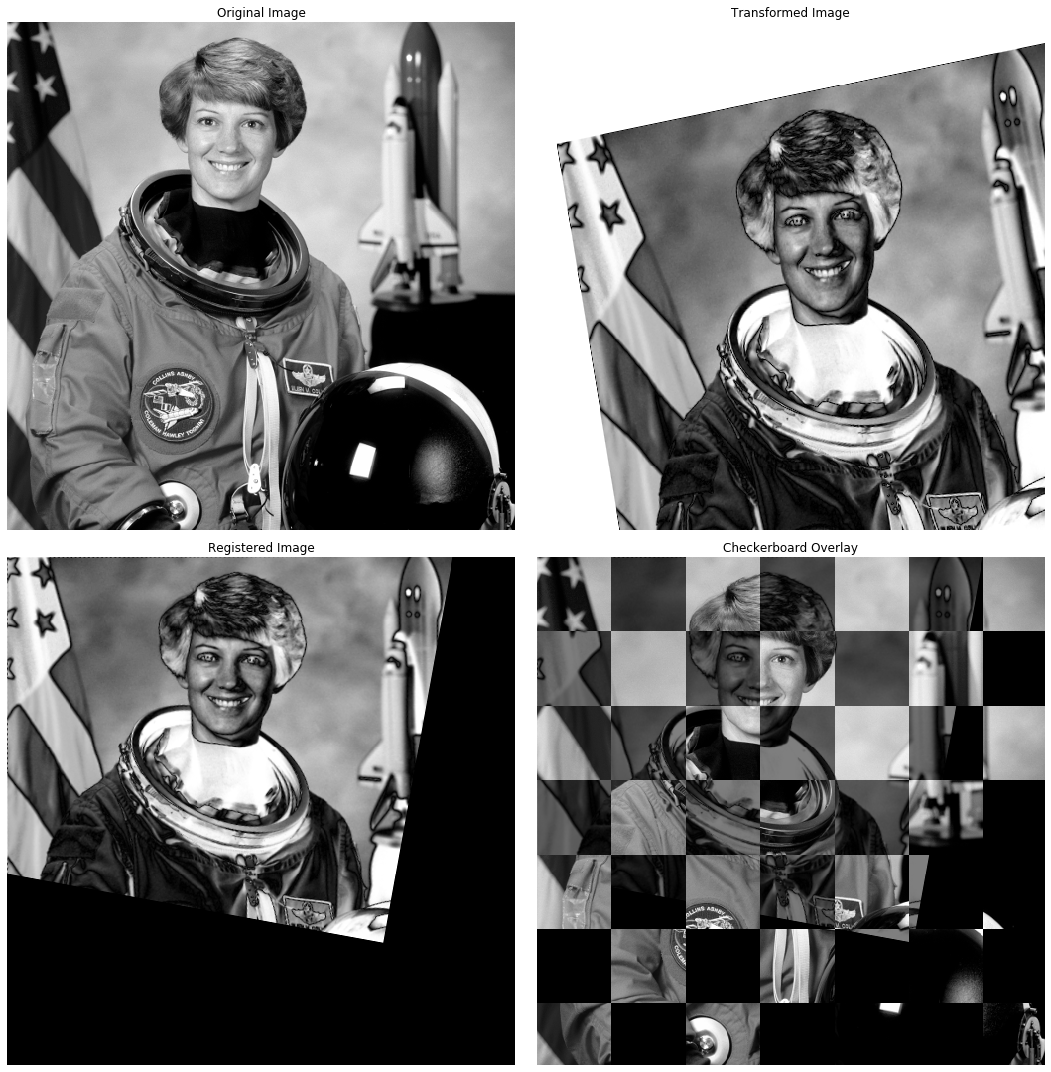

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))

for ax in [ax1, ax2, ax3, ax4]:
    ax.axis('off')
    
ax1.imshow(dst, cmap="gray")

ax2.imshow(src, cmap="gray")
ax3.imshow(transformed_src, cmap="gray")
ep.register.registration_comparison(ax4, dst, transformed_src, square_size=75)


ax1.set_title("Original Image")
ax2.set_title("Transformed Image")
ax3.set_title("Registered Image")
ax4.set_title("Checkerboard Overlay")
plt.tight_layout()